# **GANs (Generative Adversarial Networks)** 🎨

## Implementações de GANs padrão usando camadas totalmente conectadas e a biblioteca Keras (Dataset MNIST - Dígitos Manuscritos)

### Dr. Ahirton Lopes

- Dados

Redimensionando as imagens MNIST entre -1 e 1.

- Gerador

Rede neural simples totalmente conectada, ativação LeakyReLU e BatchNormalization.

A entrada para o gerador é chamada de 'amostra latente' (100 valores), que é uma série de números gerados aleatoriamente, e produz 784 (= 28x28) pontos de dados que representam uma imagem de dígito. Utilizaremos a distribuição normal.

A última ativação é tanh.

- Discriminador

Rede neural simples totalmente conectada e ativação LeakyReLU.

A última ativação é sigmóide.

- Perda

binary_crossentropy

- Otimizador

Adam (lr = 0,0002, beta_1 = 0,5) batch_size = 64 épocas = 30



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, BatchNormalization
from tensorflow.keras.optimizers.legacy import Adam
from keras import initializers

In [ ]:
# Carregando nosso dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()

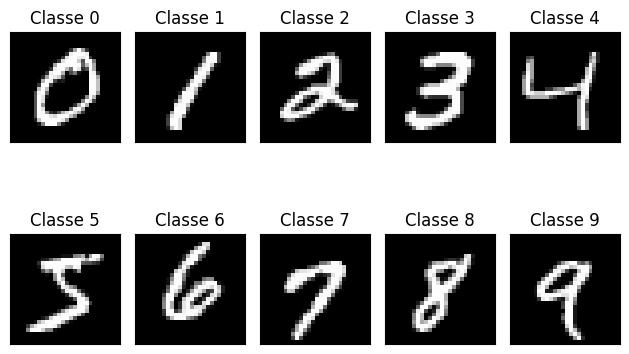

In [ ]:
fig = plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    x_y = X_train[y_train == i]
    plt.imshow(x_y[0], cmap='gray', interpolation='none')
    plt.title("Classe %d" % (i))
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()

In [ ]:
print('X_train.shape', X_train.shape)

# Transformando nossas imagens de entrada

X_train = X_train.reshape(60000, 28*28)

# Normalizando nossas entradas entre (-1, 1)

X_train = (X_train.astype('float32') / 255 - 0.5) * 2

print('X_train reshape:', X_train.shape)

X_train.shape (60000, 28, 28)
X_train reshape: (60000, 784)


In [ ]:
# Dimensão de espaço latente

latent_dim = 100

# Dimensão da imagem 28x28

img_dim = 784

init = initializers.RandomNormal(stddev=0.02)

# Rede geradora

generator = Sequential()

# Camada de entra e camada escondida 1

generator.add(Dense(128, input_shape=(latent_dim,), kernel_initializer=init))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Camada escondida 2

generator.add(Dense(256))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Camada escondida 3

generator.add(Dense(512))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Camada de saída (output)

generator.add(Dense(img_dim, activation='tanh'))


In [ ]:
# Printando nosso sumário

generator.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               12928     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 128)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 256)               33024     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 256)               0         
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                      

In [ ]:
# Rede Discriminadora (Discriminator)
discriminator = Sequential()

# Camada de Entrada (Input) e Camada Escondida 1
discriminator.add(Dense(128, input_shape=(img_dim,), kernel_initializer=init))
discriminator.add(LeakyReLU(alpha=0.2))

# Camada Escondida 2
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))

# Camada Escondida 3
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(alpha=0.2))

# Camada de Saída (Output)
discriminator.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
discriminator.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               33024     
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 512)               131584    
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 512)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [ ]:
# Otimizador

optimizer = Adam(lr=0.0002, beta_1=0.5)
discriminator.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
discriminator.trainable = False

d_g = Sequential()
d_g.add(generator)
d_g.add(discriminator)
d_g.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

In [ ]:
# Printando um sumário de nosso modelo
d_g.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 784)               583312    
                                                                 
 sequential_4 (Sequential)   (None, 1)                 265601    
                                                                 
Total params: 848,913
Trainable params: 581,520
Non-trainable params: 267,393
_________________________________________________________________


epoca = 1/30, d_loss=0.713, g_loss=1.970                                                                                                     
1/1 [==============================] - 0s 106ms/step


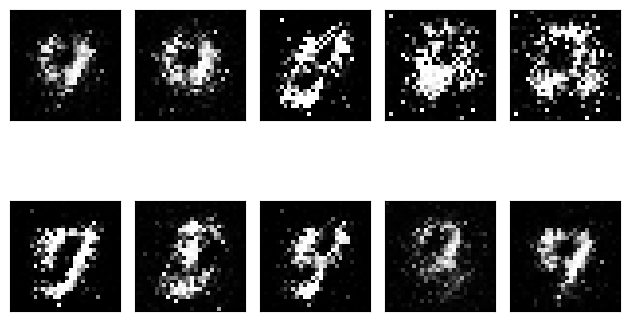

epoca = 2/30, d_loss=0.665, g_loss=1.730                                                                                                     
epoca = 3/30, d_loss=0.594, g_loss=1.365                                                                                                     
epoca = 4/30, d_loss=0.626, g_loss=1.277                                                                                                     
epoca = 5/30, d_loss=0.594, g_loss=1.236                                                                                                     
epoca = 6/30, d_loss=0.520, g_loss=1.190                                                                                                     
epoca = 7/30, d_loss=0.582, g_loss=1.241                                                                                                     
epoca = 8/30, d_loss=0.606, g_loss=1.176                                                                                                     
epoca 

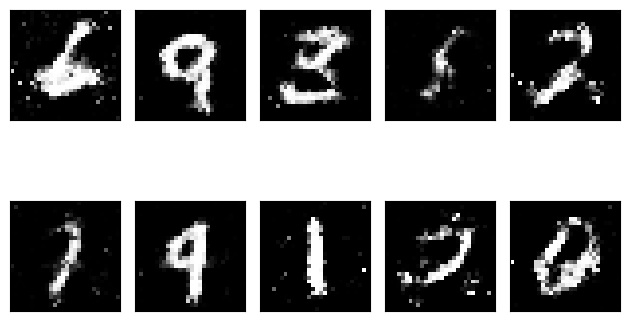

epoca = 12/30, d_loss=0.601, g_loss=1.109                                                                                                     
epoca = 13/30, d_loss=0.577, g_loss=1.133                                                                                                     
epoca = 14/30, d_loss=0.573, g_loss=1.169                                                                                                     
epoca = 15/30, d_loss=0.560, g_loss=1.109                                                                                                     
epoca = 16/30, d_loss=0.584, g_loss=1.107                                                                                                     
epoca = 17/30, d_loss=0.579, g_loss=1.113                                                                                                     
epoca = 18/30, d_loss=0.555, g_loss=1.110                                                                                                     

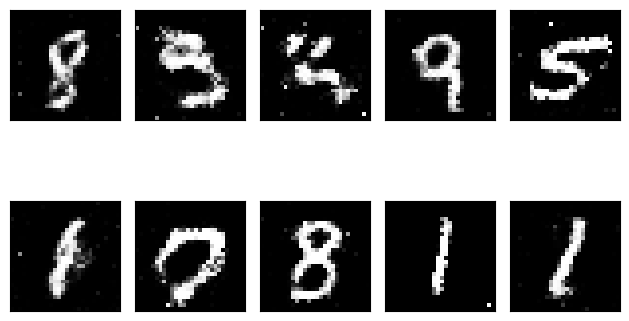

epoca = 22/30, d_loss=0.562, g_loss=1.147                                                                                                     
epoca = 23/30, d_loss=0.575, g_loss=1.187                                                                                                     
epoca = 24/30, d_loss=0.600, g_loss=1.071                                                                                                     
epoca = 25/30, d_loss=0.632, g_loss=1.203                                                                                                     
epoca = 26/30, d_loss=0.546, g_loss=1.163                                                                                                     
epoca = 27/30, d_loss=0.553, g_loss=1.193                                                                                                     
epoca = 28/30, d_loss=0.590, g_loss=1.081                                                                                                     

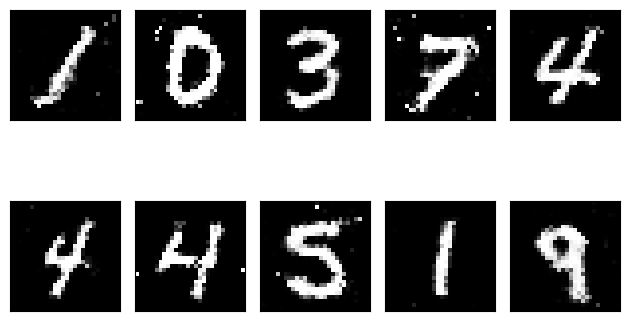

In [ ]:
epochs = 30
batch_size = 64
smooth = 0.1

real = np.ones(shape=(batch_size, 1))
fake = np.zeros(shape=(batch_size, 1))

d_loss = []
d_g_loss = []

for e in range(epochs + 1):
    for i in range(len(X_train) // batch_size):

        discriminator.trainable = True

        X_batch = X_train[i*batch_size:(i+1)*batch_size]
        d_loss_real = discriminator.train_on_batch(x=X_batch, y=real * (1 - smooth))

        z = np.random.normal(loc=0, scale=1, size=(batch_size, latent_dim))
        X_fake = generator.predict_on_batch(z)
        d_loss_fake = discriminator.train_on_batch(x=X_fake, y=fake)

        d_loss_batch = 0.5 * (d_loss_real[0] + d_loss_fake[0])

        discriminator.trainable = False
        d_g_loss_batch = d_g.train_on_batch(x=z, y=real)

        print(
            'epoca = %d/%d, batch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, i, len(X_train) // batch_size, d_loss_batch, d_g_loss_batch[0]),
            100*' ',
            end='\r'
        )

    d_loss.append(d_loss_batch)
    d_g_loss.append(d_g_loss_batch[0])
    print('epoca = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, d_loss[-1], d_g_loss[-1]), 100*' ')

    if e % 10 == 0:
        samples = 10
        x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, latent_dim)))

        for k in range(samples):
            plt.subplot(2, 5, k+1)
            plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        plt.show()

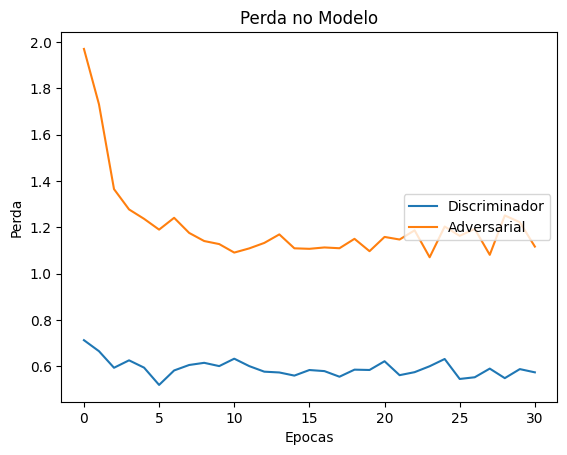

In [ ]:
# Plotando metricas

plt.plot(d_loss)
plt.plot(d_g_loss)
plt.title('Perda no Modelo')
plt.ylabel('Perda')
plt.xlabel('Epocas')
plt.legend(['Discriminador', 'Adversarial'], loc='center right')
plt.show()